<a href="https://colab.research.google.com/github/bft-developers/dojoContents/blob/main/test/character_recognition_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 必要なモジュールをインストール
# graphviz:グラフ描画ツール
# pydot
!apt-get -qq install -y graphviz && pip install -q pydot

In [ ]:
#import keras
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 500 
num_classes = 10

epochs = 1

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
print(y_train)
print(y_test)


11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


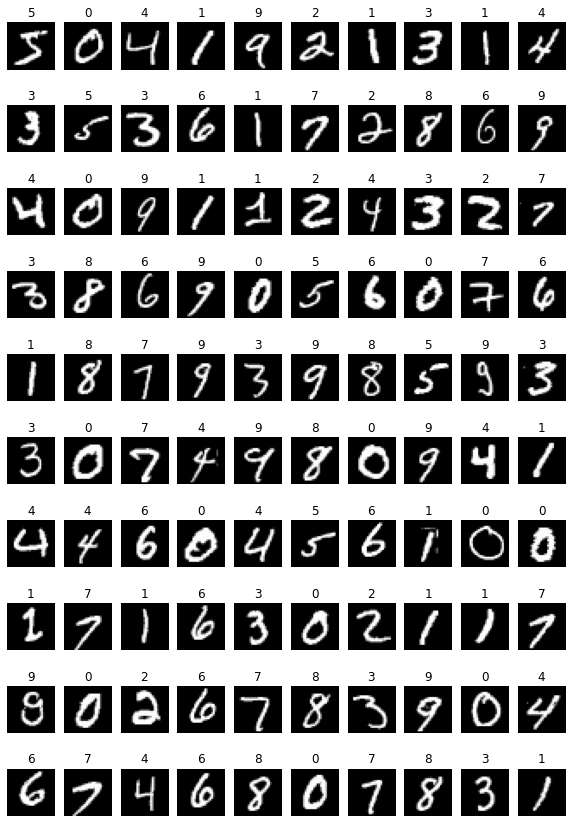

In [ ]:
# テスト用画像がどんな感じになっているかを見る
import matplotlib.pyplot as plot

plot.figure(figsize=(10,15))

for i in range(100):
    plot.subplot(10, 10, i + 1, xticks=[], yticks=[])
    plot.title(y_train[i].argmax())
    plot.axis('off')
    plot.imshow(x_train[i].reshape((28, 28)), cmap='gray')
    

In [ ]:
# モデルの定義
# Sequentialモデルとは、ニューラルネットワークの各層を順番につなげていったモデル
model = Sequential()

# 全結合型ニューラルネットワーク
# Dense(units, activation, input_shape)
# units : 出力の数
# activation : 活性化関数
# input_shape 最初だけ指定する。入力層の形 この場合、28*28=784 のデータを表している。
model.add(Dense(15, activation='relu',input_shape=(784,)))

# 全結合型ニューラルネットワーク 活性化関数はrelu
model.add(Dense(20, activation='relu'))

# ドロップアウト層を定義
# ドロップアウト層 ： 過学習を避けるため、出力結果の一部を捨てる
model.add(Dropout(0.2))

# 全結合型ニューラルネットワーク softmaxで出力数値を確率に変換(出力の総和が1になる)
# 最終的な出力は num_classesに定義したクラスタリング数を指定する。
model.add(Dense(num_classes, activation='softmax'))

# 作成したモデルの概要を出力
model.summary()


# モデルをコンパイルする。
# loss : 損失関数
# optimizer : 最適化アルゴリズム
# metrics : 評価関数
# 損失関数 : categorical_crossentropy(交差エントロピー)
# 勾配法 : RMSprop 誤差を最小化するためのアルゴリズム
# 評価関数 : accuracy (正答率)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                320       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 12,305
Trainable params: 12,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,
                    batch_size = batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test, verbose = 1)
print('Test loss:',score[0])
print('Test accuracy:', score[1])

# ここでは学習モデルを変数'model'に格納して使用している。
# 学習モデルを他で再利用したい場合、モデルを外部ファイルに出力することも可能。
# 例) 学習モデルをjson形式ファイルに保存する場合
# open('train_data.json',"w").write(model.to_json())



313/313 [==============================] - 1s 2ms/step - loss: 0.5622 - accuracy: 0.8584
Test loss: 0.5622045993804932
Test accuracy: 0.8583999872207642


   ====================================Test Data==================================


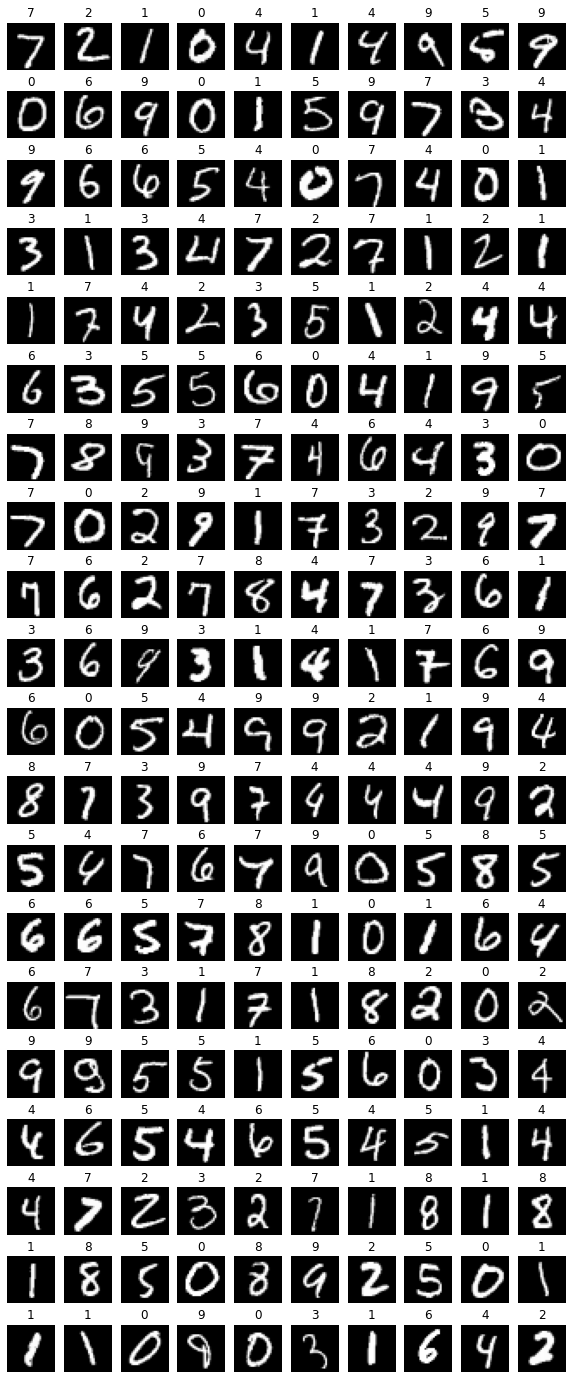

   ===================================Result Data=================================


In [ ]:
results = model.predict(x_test)


# !!!!!!!認識前のデータセットを描画する!!!!!!!!!!
plot.figure(figsize=(10,25))
print('   \
====================================Test Data==================================')
for i in range(200):
    plot.subplot(20, 10, i + 1)
    plot.title(y_test[i].argmax())
    plot.axis('off')
    plot.imshow(x_test[i].reshape((28, 28)), cmap='gray')
# ここまで
plot.show()
print('   \
===============================================================================')


# !!!!!!!認識後のデータセットを描画する!!!!!!!!!!
# ()で閉じられている数字が答え 閉じられていない数字がAIの認識結果
# 赤字標記は認識で間違ったもの
plot.figure(figsize=(10,25))
print('   \
===================================Result Data=================================')
for i in range(200):
  label = results[i].argmax()
  gt_label = y_test[i].argmax()
  
  plot.subplot(20, 10, i+1)
  if label == gt_label:
    title_color = 'black'
  else:
    title_color = 'red'
  plot.title(str(label) + ' (' + str(gt_label) + ')', color=title_color)
  plot.axis('off')
  plot.imshow(x_test[i].reshape((28, 28)), cmap='gray')

plot.show()
print('   \
===============================================================================')
